<a href="https://colab.research.google.com/github/kSahatova/ITMO_MLTech/blob/main/CNN_and_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Network 



Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

In [24]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np 
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# In order to make training process faster, data is loading to the colab disk space
# (copying without zip file take a lot of time on my machine)
!cp '/content/drive/MyDrive/Cats_and_Dogs.zip' '/content'

In [ ]:
!unzip "/content/Cats_and_Dogs.zip" -d "/content/Cats_and_Dogs"

In [5]:
%cd  /content/Cats_and_Dogs

/content/Cats_and_Dogs


In [6]:
# Initialization of the folders with train, test and validation datasets 

train = './train'
val =   './val'
test =  './test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 

# input shape
input_shape = (img_width, img_height, 3)

# minibatch size
batch_size = 64
# train set size
nb_train_samples =  len(os.listdir('train/cats'))+len(os.listdir('train/dogs'))
# validation set size 
nb_validation_samples = len(os.listdir('val/cats'))+len(os.listdir('val/dogs'))
# test set size
nb_test_samples = len(os.listdir('test/cats'))+len(os.listdir('test/dogs'))

## Prepare the data.

Image preprocessing with the built-in _ImageGenerator()_ function which performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [7]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


The network architecture consists of the following layers:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Keras documentation: https://keras.io/layers/about-keras-layers/

In [22]:
# Design of the network architecture

def build_model():
  model = Sequential()

  # 1: +Convolutional
  # For example:
  model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
  model.add(Activation('relu'))

  # 2: +Pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # 3:
  model.add(Conv2D(32, (3, 3)))
  #     +Relu
  model.add(Activation('relu'))

  # 4:  +Pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # 5:  +Convolutional
  model.add(Conv2D(64, (3, 3), activation='relu'))

  # 6:  +Pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # 7:  +Flattening
  model.add(Flatten())

  # 8:  +Dense
  model.add(Dense(units=64, activation='relu'))

  # 9:  +Dropout
  model.add(Dropout(0.5))

  # 10: +Dense
  model.add(Dense(units=1, activation='sigmoid'))

  return model

In [23]:
model = build_model()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

In [37]:
model_history = model.fit( train_generator,
              steps_per_epoch=nb_train_samples // batch_size,
              epochs=20, # check the loss and accuracy;
              validation_data=val_generator,
              validation_steps=nb_validation_samples // batch_size, callbacks=[early_stopping])

Epoch 1/20
312/312 [==============================] - 60s 194ms/step - loss: 0.0584 - accuracy: 0.9783 - val_loss: 0.8930 - val_accuracy: 0.8450
Epoch 2/20
312/312 [==============================] - 61s 194ms/step - loss: 0.0614 - accuracy: 0.9768 - val_loss: 0.7755 - val_accuracy: 0.8429
Epoch 3/20
312/312 [==============================] - 60s 194ms/step - loss: 0.0612 - accuracy: 0.9775 - val_loss: 0.7255 - val_accuracy: 0.8413
Epoch 4/20
312/312 [==============================] - 60s 193ms/step - loss: 0.0558 - accuracy: 0.9786 - val_loss: 0.8167 - val_accuracy: 0.8454
Epoch 5/20
312/312 [==============================] - 60s 194ms/step - loss: 0.0542 - accuracy: 0.9794 - val_loss: 0.7977 - val_accuracy: 0.8462
Epoch 6/20
312/312 [==============================] - 61s 194ms/step - loss: 0.0585 - accuracy: 0.9766 - val_loss: 0.8133 - val_accuracy: 0.8495
Epoch 7/20
312/312 [==============================] - 61s 195ms/step - loss: 0.0469 - accuracy: 0.9820 - val_loss: 0.7685 - val_ac

In [38]:
print("Training stopped on the {num} epoch".format(num=early_stopping.stopped_epoch))

Training stopped on the 10 epoch


In [39]:
# Accuracy evaluation
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 83.77%


In [40]:
model_histories = []
model_histories.append(model_history)

Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

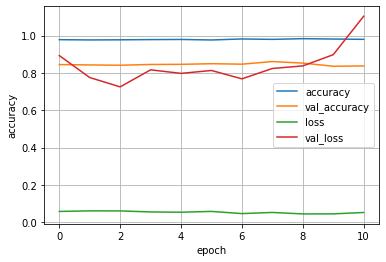

In [43]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

Before using "transfer learning", it was like:


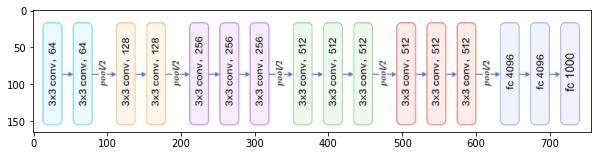

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

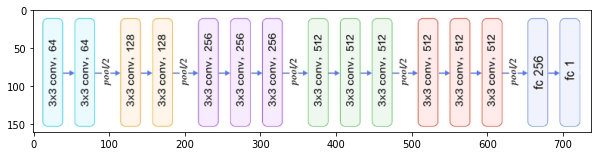

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [9]:
# Addition of fullyconnected layers to the chosen backbone:

def backbone_add_layers(backbone):
  model = Sequential()
  model.add(backbone)

  # + flattening
  model.add(Flatten())
  # + Dense fullyconnected layer with 256 neurons
  # + ReLu
  model.add(Dense(units=256, activation='relu'))
  # + Dropout
  model.add(Dropout(0.5))
  # + Dense layer with 1 neuron
  # + sigmoid
  model.add(Dense(units=1, activation='sigmoid'))

  return model

  

In [10]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [11]:
model_vgg16 = backbone_add_layers(vgg16_net)
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
model_vgg16.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [13]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=7,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/7
312/312 [==============================] - 84s 243ms/step - loss: 0.5902 - accuracy: 0.6698 - val_loss: 0.3495 - val_accuracy: 0.8590
Epoch 2/7
312/312 [==============================] - 75s 242ms/step - loss: 0.3512 - accuracy: 0.8495 - val_loss: 0.2944 - val_accuracy: 0.8882
Epoch 3/7
312/312 [==============================] - 74s 238ms/step - loss: 0.3005 - accuracy: 0.8723 - val_loss: 0.2720 - val_accuracy: 0.8935
Epoch 4/7
312/312 [==============================] - 73s 235ms/step - loss: 0.2784 - accuracy: 0.8830 - val_loss: 0.2551 - val_accuracy: 0.9054
Epoch 5/7
312/312 [==============================] - 73s 233ms/step - loss: 0.2590 - accuracy: 0.8922 - val_loss: 0.2452 - val_accuracy: 0.9087
Epoch 6/7
312/312 [==============================] - 73s 233ms/step - loss: 0.2523 - accuracy: 0.8952 - val_loss: 0.2391 - val_accuracy: 0.9112
Epoch 7/7
312/312 [==============================] - 72s 232ms/step - loss: 0.2419 - accuracy: 0.9016 - val_loss: 0.2342 - val_accuracy:

In [ ]:
# Download the weights of the ResNet152V2 network trained on the ImageNet dataset:

from keras.applications import ResNet152V2

resnet152v2 = ResNet152V2(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
resnet152v2.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

resnet152v2.summary()                       # pay attention to the number of trained and untrained parameters

In [15]:
model_resnet152v2 = backbone_add_layers(resnet152v2)
model_resnet152v2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 71,439,361
Trainable params: 13,107,713
Non-trainable params: 58,331,648
_________________________________________________________________


In [16]:
model_resnet152v2.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [17]:
history_resnet152v2 = model_resnet152v2.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=7,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/7
312/312 [==============================] - 94s 276ms/step - loss: 0.3745 - accuracy: 0.8999 - val_loss: 0.1072 - val_accuracy: 0.9655
Epoch 2/7
312/312 [==============================] - 85s 272ms/step - loss: 0.0890 - accuracy: 0.9677 - val_loss: 0.0984 - val_accuracy: 0.9655
Epoch 3/7
312/312 [==============================] - 87s 278ms/step - loss: 0.0529 - accuracy: 0.9805 - val_loss: 0.0880 - val_accuracy: 0.9700
Epoch 4/7
312/312 [==============================] - 88s 283ms/step - loss: 0.0337 - accuracy: 0.9870 - val_loss: 0.0882 - val_accuracy: 0.9725
Epoch 5/7
312/312 [==============================] - 89s 284ms/step - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.0890 - val_accuracy: 0.9708
Epoch 6/7
312/312 [==============================] - 89s 284ms/step - loss: 0.0183 - accuracy: 0.9937 - val_loss: 0.0906 - val_accuracy: 0.9704
Epoch 7/7
312/312 [==============================] - 89s 285ms/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.0956 - val_accuracy:

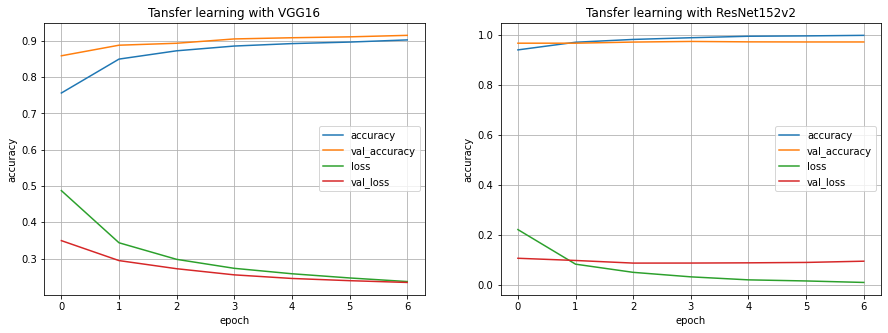

In [18]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(history_vgg16.history['accuracy'], label='accuracy')
ax1.plot(history_vgg16.history['val_accuracy'], label='val_accuracy')
ax1.plot(history_vgg16.history['loss'], label='loss')
ax1.plot(history_vgg16.history['val_loss'], label='val_loss')
ax1.set(ylabel='accuracy', xlabel='epoch')
ax1.set_title('Tansfer learning with VGG16')
ax1.legend()
ax1.grid()

ax2.plot(history_resnet152v2.history['accuracy'], label='accuracy')
ax2.plot(history_resnet152v2.history['val_accuracy'], label='val_accuracy')
ax2.plot(history_resnet152v2.history['loss'], label='loss')
ax2.plot(history_resnet152v2.history['val_loss'], label='val_loss')
ax2.set(ylabel='accuracy', xlabel='epoch')
ax2.set_title('Tansfer learning with ResNet152v2')
ax2.legend()
ax2.grid()

In [19]:
scores1 = model_vgg16.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores1[1]*100))

scores2 = model_resnet152v2.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores2[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 89.74%
Accuracy on test data: 96.43%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Class:  cat


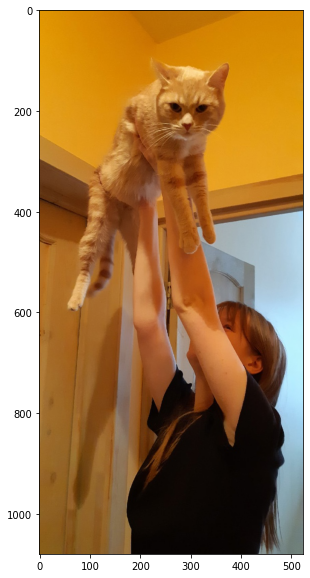

In [21]:
pic = image.load_img('/content/Simba.jpg')
input_arr = image.img_to_array(pic)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = np.resize(input_arr, (1, 150, 150, 3))
predictions = model_resnet152v2.predict_classes(input_arr)
if predictions[0] == train_generator.class_indices['cats']:
  print("\nClass: ",  'cat')
else:
    print("\nClass: ",  'dog')

plt.figure(figsize = (10,10))
plt.imshow(pic)
plt.show()


In [ ]:
def infer(model, directory_):
  batch_size = 2
  nb_test_samples = len(os.listdir(path = directory_+'/cats')) + len(os.listdir(path = directory_+'/dogs'))

  test_generator = datagen.flow_from_directory(
  directory_,
  target_size=(img_width, img_height),
  batch_size= 2,
  class_mode='binary')

  result = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
  print("Accuracy on test data: %.2f%%" % (result[1]*100))
  

In [ ]:
import shutil

#shutil.rmtree("/content/custom/.ipynb_checkpoints")
infer(model_vgg16, '/content/custom')


Found 2 images belonging to 2 classes.
Accuracy on test data: 100.00%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
